In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [0]:
env = gym.make("FrozenLake-v0")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 10000
learning_rate = 0.1
max_steps = 99
discount = 0.94
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
decay_rate = 0.001

In [0]:
q_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [6]:
rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):
    #env.render()

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    # Update q-table
    q_table[state, action] = q_table[state, action] + learning_rate * (reward + 
                  discount * np.max(q_table[new_state, :]) - q_table[state, action])
    state = new_state

    cumul_rewards += reward
    if reward > 0:
      steps_till_success.append(step)

    if done == True:
      break

  #env.render()
  if cumul_rewards < 1:
    steps_till_success.append(100)
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  rewards.append(cumul_rewards)
  #print("**********************************************************************")

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')
print(f'Min step to success: {min(steps_till_success)}')

Average reward:0.2697
Min step to success: 5


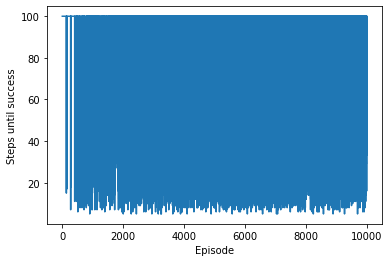

In [7]:
plt.plot(steps_till_success)
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

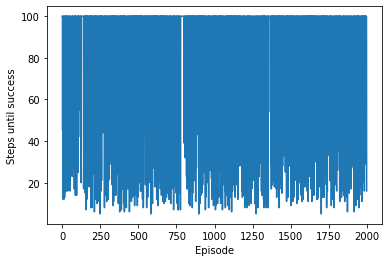

In [8]:
plt.plot(steps_till_success[7999:10000])
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

In [9]:
print(q_table)

[[0.16519953 0.14297033 0.12962556 0.12495282]
 [0.07639811 0.07637034 0.07506634 0.11608764]
 [0.12206724 0.08973812 0.08588276 0.08892573]
 [0.05932182 0.06845141 0.03948402 0.08262091]
 [0.18772024 0.11640034 0.10250681 0.09802075]
 [0.         0.         0.         0.        ]
 [0.10400727 0.11870884 0.11068809 0.01798862]
 [0.         0.         0.         0.        ]
 [0.10000504 0.14296211 0.12362322 0.24136939]
 [0.23412749 0.34264092 0.19784409 0.16089873]
 [0.31348934 0.25122614 0.19724723 0.20699382]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.22158088 0.20881608 0.49123064 0.34473501]
 [0.46296518 0.56126546 0.65980743 0.4275909 ]
 [0.         0.         0.         0.        ]]


In [10]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 9
****************************************************
EPISODE  1
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 28
****************************************************
EPISODE  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 27
****************************************************
EPISODE  3
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 30
****************************************************
EPISODE  4
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 31


In [11]:
total_reward = 0

for episode in range(100):
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
            break
        state = new_state
env.close()

print(f'Successful runs out of 100: {total_reward}')

Successful runs out of 100: 54.0
